# Sistemas de Recomendação
- Não é um ‘Machine Learning’, é na verdade uma aplicação específica de Pandas.
- Filtragem Colaborativa: ('Conhecimento da massa')
     - Pode ser 'Filtragem por memória' ou 'Filtragem por modelo'
     - Produz recomendações baseadas no conhecimento das atitudes em relação aos itens.
     - " Pessoas que curtiram isso costumam curtir também: "
     
- Conteúdo - dependente:
    - Mais simples
    - Baseia-se nas similaridades entre os itens.

# Análise exploratória:

In [1]:
import numpy as np
import pandas as pd

In [2]:
column_name = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Sistemas de recomendação/u.data')

In [3]:
df

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [6]:
df = pd.read_csv('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Sistemas de recomendação/u.data', sep='\t', names=column_name)

In [7]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [8]:
movie = pd.read_csv('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Sistemas de recomendação/Movie_Id_Titles')
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [9]:
newDF = pd.merge(df, movie, on= 'item_id')
newDF

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [10]:
import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('white')
%matplotlib inline

In [21]:
newDF.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)     # Filmes que ninguém conhece, 
                                                                         #média muito alta pois foram feitas poucas avaliações

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [23]:
newDF.groupby('title')['rating'].count().sort_values(ascending=False).head(10) # então vamos ver os filmes com mais avaliações

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [25]:
ratings = pd.DataFrame(newDF.groupby('title')['rating'].mean())

In [28]:
ratings['count'] = pd.DataFrame(newDF.groupby('title')['rating'].count())
ratings

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


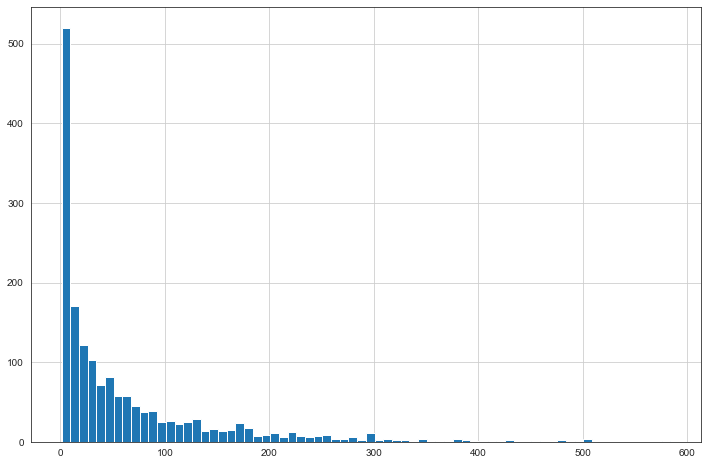

In [30]:
plt.figure(figsize=(12,8))
ratings['count'].hist(bins=70)# muitos filmes avaliados 1 vez, e poucos foram muitas vezes avaliados...

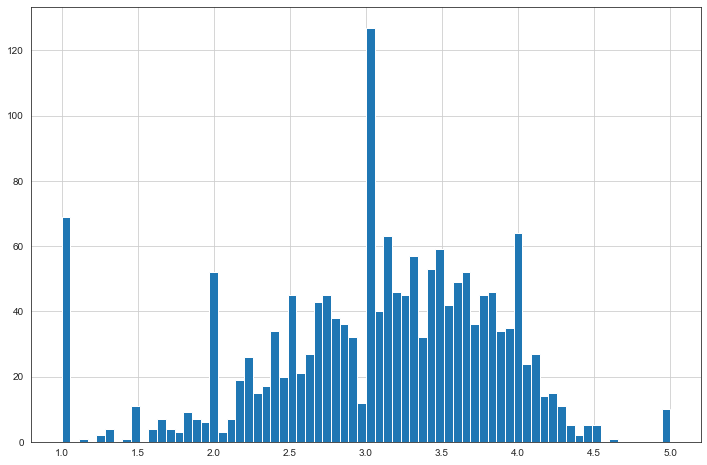

In [32]:
plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=70)

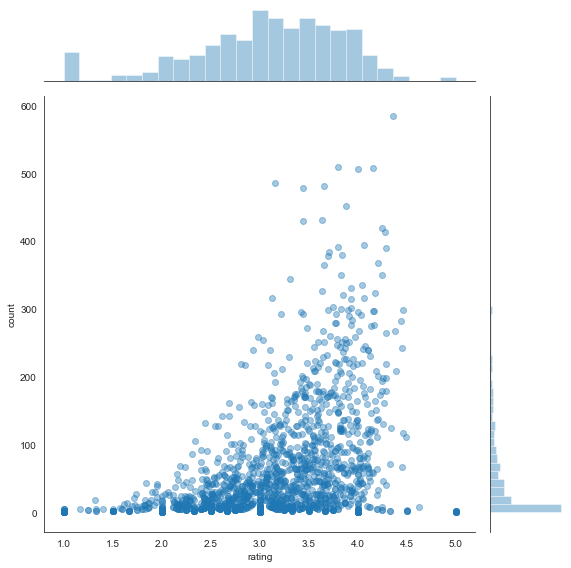

In [35]:
#plt.figure(figsize=(12,8))
sea.jointplot(x='rating',y='count',data = ratings, alpha=0.4, height=8)

# Recomendações:

In [36]:
moviemat = newDF.pivot_table(index='user_id', columns='title', values='rating')

In [37]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ratings.sort_values('count', ascending=False)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [43]:
StarWarsRatings = moviemat['Star Wars (1977)']
LiarLiarRatings = moviemat['Liar Liar (1997)']

In [44]:
similar_to_starwars = moviemat.corrwith(StarWarsRatings)
similar_to_LiarLiar = moviemat.corrwith(LiarLiarRatings)

C:\Users\Gabriel\miniconda3\envs\bloqueios\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Gabriel\miniconda3\envs\bloqueios\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [48]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [51]:
corr_starwars.sort_values('Correlation', ascending=False)     #Correlações não muito úteis, pois tem casos onde o filme foi 
                                                              # avaliado igual ao starwars, mas apenas por uma pessoa.

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [52]:
corr_starwars = corr_starwars.join(ratings['count'])

In [53]:
corr_starwars

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


- Abaixo então, vamos setar o mínimo pra mais de 100 avaliações, e colocar em ordem por correlação

In [54]:
corr_starwars[corr_starwars['count']>100].sort_values('Correlation', ascending=False) 

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [58]:
corr_liar = pd.DataFrame(similar_to_LiarLiar, columns=['Correlations'])
corr_liar.dropna(inplace=True)

In [59]:
corr_liar

,Correlations
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [60]:
corr_liar = corr_liar.join(ratings['count'])
corr_liar

,Correlations,count
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [63]:
corr_liar[corr_liar['count']>100].sort_values('Correlations', ascending=False)

,Correlations,count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
